# 1. 하나로 합치고 저장 (처음 한 번만 사용하면 됨.)
6개의 csv파일 하나로 합쳐서 저장하고 불러오기

In [37]:
import pandas as pd

PATH = '/content/drive/MyDrive/data/instacart-market-basket-analysis/' # csv파일이 들어있는 폴더 경로 지정

In [13]:
priors = pd.read_csv(PATH + 'order_products__prior.csv', dtype={
            'order_id': np.uint32,          # 1 ~ 3421083
            'product_id': np.uint16,        # 1 ~ 49688
            'add_to_cart_order': np.uint8,  # 1 ~ 80 
            'reordered': np.uint8})         # 0 ~ 1
orders = pd.read_csv(PATH + 'orders.csv', dtype={
        'order_id': np.uint32,              # 1 ~ 3421083
        'user_id': np.uint32,               # 1 ~ 206209
        'eval_set': 'category',             # 3가지
        'order_number': np.uint8,           # 1 ~ 100
        'order_dow': np.uint8,              # 0 ~ 6 
        'order_hour_of_day': np.uint8,      # 0 ~ 23
        'days_since_prior_order': np.float32})
products = pd.read_csv(PATH + 'products.csv', dtype={
        'product_id': np.uint16,     # 1 ~ 49688
        'aisle_id': np.uint8,        # 1 ~ 134
        'department_id': np.uint8}) # 1 ~ 21
aisles = pd.read_csv(PATH + 'aisles.csv', dtype={
        'product_id': np.uint16})     # 1 ~ 49688
departments = pd.read_csv(PATH + 'departments.csv', dtype={
        'product_id': np.uint16})
train = pd.read_csv(PATH + 'order_products__train.csv', dtype={
            'order_id': np.uint32,          # 1 ~ 3421083
            'product_id': np.uint16,        # 1 ~ 49688
            'add_to_cart_order': np.uint8,  # 1 ~ 80 
            'reordered': np.uint8})         # 0 ~ 1

In [3]:
df = priors.append(train)
df = df.merge(products, on='product_id', how='left')
df = df.merge(aisles, on='aisle_id', how='left')
df = df.merge(departments, on='department_id', how='left')
df = df.merge(orders, on='order_id', how='outer')
df = df.astype({'product_id': np.float32, 'add_to_cart_order': np.float32, 'reordered': np.float32, 
                'aisle_id': np.float32,'department_id':np.float32, 'product_name' : 'category', 
                'aisle' : 'category', 'department' : 'category'})
col = ['user_id', 'order_number', 'order_id', 'product_id', 'product_name', 'add_to_cart_order', 'reordered', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle_id', 'aisle', 'department_id', 'department', 'eval_set']
df = df[col]
df.sort_values(by=['user_id', 'order_number'], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33894106 entries, 0 to 33894105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 uint32  
 1   order_number            uint8   
 2   order_id                uint32  
 3   product_id              float32 
 4   product_name            category
 5   add_to_cart_order       float32 
 6   reordered               float32 
 7   order_dow               uint8   
 8   order_hour_of_day       uint8   
 9   days_since_prior_order  float32 
 10  aisle_id                float32 
 11  aisle                   category
 12  department_id           float32 
 13  department              category
 14  eval_set                category
dtypes: category(4), float32(6), uint32(2), uint8(3)
memory usage: 1.4 GB


In [4]:
df.isnull().sum()

user_id                         0
order_number                    0
order_id                        0
product_id                  75000
product_name                75000
add_to_cart_order           75000
reordered                   75000
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
aisle_id                    75000
aisle                       75000
department_id               75000
department                  75000
eval_set                        0
dtype: int64

하나로 합친 df 저장

In [5]:
df.to_pickle(PATH + 'EDA.pkl')

# 2. 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=1.5)
%matplotlib inline
color = sns.color_palette()

PATH = '/content/drive/MyDrive/data/instacart-market-basket-analysis/' # csv파일이 들어있는 폴더 경로 지정

In [2]:
df = pd.read_pickle(PATH + 'EDA.pkl')

# 기본 정보

- user_id(범주, 순서X) : 총 206,209 명
- order_number(범주, 순서O) : 유저별 주문의 순서를 알 수 있다. 최소 주문 수는 4, 최대는 100이다.
- order_id (범주, 순서X) : 총 3,421,083개
- product_id (범주, 순서X) : 총 49,685개.
- add_to_cart_order (범주, 순서O) : 제품이 주문에서 몇 번째로 장바구니에 담겼는지 알 수 있다. 
- reordered (범주, 순서X) : 해당 제품을 고객이 재주문했는지 알 수 있다. 
- order_dow	(범주, 순서X) : 해당 주문의 요일
- order_hour_of_day	(범주, 순서X) : 해당 주문의 시간 
- days_since_prior_order (범주, 순서X) : 유저의 이전 주문과의 차이이다. (일) 최대 30일. 30일 이상도 30으로 표기된다. 


총 유저 수

In [ ]:
df.user_id.nunique()

206209

### order_number

In [ ]:
df.groupby('user_id')['order_number'].max().describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64

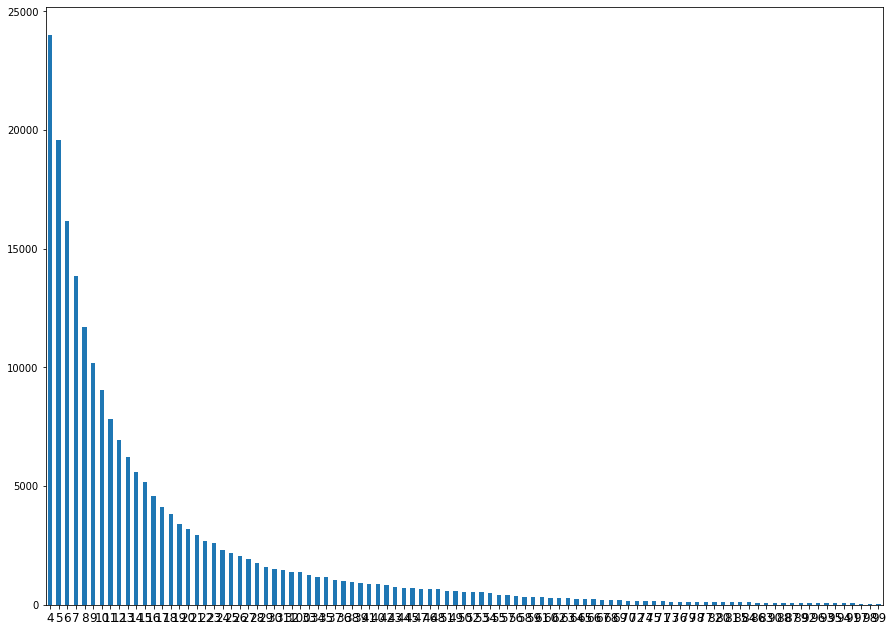

In [ ]:
plt.figure(figsize=(15,11))
df.groupby('user_id')['order_number'].max().value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

총 주문 수

In [ ]:
df.order_id.nunique()

3421083

총 제품 수

In [ ]:
df.product_id.nunique()

49685

요일 별 

- 주문 수 

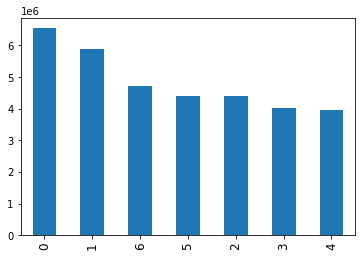

In [ ]:
df.order_dow.value_counts().plot.bar()

시간 별

- 주문 수

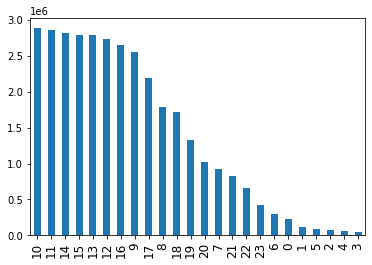

In [ ]:
df.order_hour_of_day.value_counts().plot.bar()

요일 x 시간 별

- 주문 수

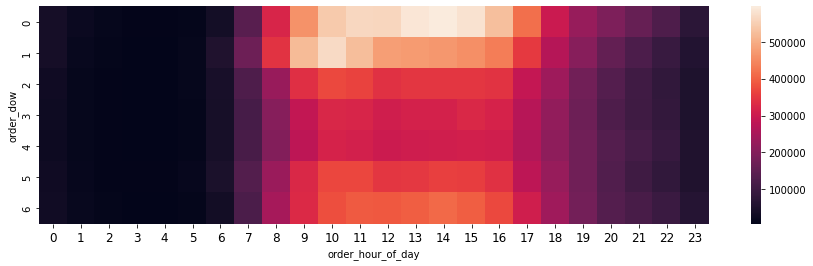

In [ ]:
plt.figure(figsize=(15, 4))
data = df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].count().reset_index().pivot('order_dow','order_hour_of_day','reordered')
sns.heatmap(data)
plt.show()


- 이전 주문과 차이 분포

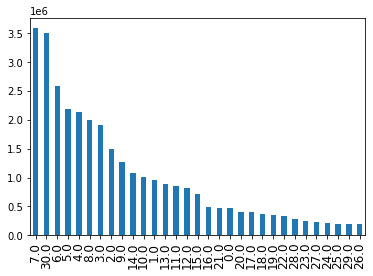

In [ ]:
df.days_since_prior_order.value_counts().plot.bar()

더 뽑아볼 수 있는 것?

# EDA

## ✅ train 유저 구매 내역

1. train 셋의 유저 명단 뽑기
2. train셋 유저의 모든 구매내역 뽑기 : priors에서 train셋 유저만 뽑기
3. 유저와 제품 1:1 매칭하기
4. train에서 reordered 뽑아서 병합

In [46]:
# 1. train 셋 유저 명단 뽑기 
train_users = df[df.eval_set == 'train'].user_id.unique() 

# 2. eval_set이 priors에서 train 셋 유저만 가져오기. train셋 유저의 모든 구매내역
train_priors = df[(df.eval_set == 'prior') &  (df.user_id.isin(train_users))]

In [ ]:
# 3. 유저, 제품으로 묶기 (제품 정보도 추가)
train_user_prod_agg_dict = {'reordered':['count', 'sum', 'mean'], 
                  'order_number':['min', 'last'], 
                  'add_to_cart_order' : ['sum', 'mean']}

train_user_prod_col = ['total_orders', 'total_reorders', 'reorder_rate', 'first_order_num', 'last_order_num', 'sum_cart_order', 'mean_cart_order']

train_priors_prods = train_priors.groupby(['user_id', 'product_id']).agg(train_user_prod_agg_dict)
train_priors_prods.columns = train_user_prod_col
train_priors_prods.reset_index(inplace=True)
train_priors_prods = train_priors_prods.merge(train_priors.drop_duplicates('product_id')[['product_id', 'product_name', 'aisle', 'department']], on='product_id', how='left')
train_priors_prods

In [52]:
# 4. reordered 뽑아서 병합
# 마지막 주문에서 해당 제품을 구매했는지 안 했는지 알 수 있다. 
train_priors_prods = train_priors_prods.merge(df[df.eval_set == 'train'][['user_id','product_id','reordered']], on=['user_id','product_id'], how='left') 
train_priors_prods['reordered'].fillna(0, inplace=True)
train_priors_prods = train_priors_prods[['user_id', 'product_name', 'reordered', 'total_orders', 'total_reorders', 'reorder_rate', 'first_order_num', 'last_order_num', 
 'sum_cart_order', 'mean_cart_order','product_id',  'aisle', 'department']]
train_priors_prods.sort_values(by=['user_id', 'total_orders'], ascending=[True, False], inplace=True, ignore_index=True)
train_priors_prods = train_priors_prods.astype({'total_orders' : np.uint8, 'product_id' : np.float32})
print(train_priors_prods.shape)
train_priors_prods.head()

(8474661, 13)


,user_id,product_name,reordered,total_orders,total_reorders,reorder_rate,first_order_num,last_order_num,sum_cart_order,mean_cart_order,product_id,aisle,department
0,1,Soda,1.0,10,9.0,0.900000,1,10,14.0,1.400000,196.0,soft drinks,beverages
1,1,Original Beef Jerky,0.0,10,9.0,0.900000,1,10,33.0,3.300000,12427.0,popcorn jerky,snacks
2,1,Pistachios,1.0,9,8.0,0.888889,2,10,30.0,3.333333,10258.0,nuts seeds dried fruit,snacks
3,1,Organic String Cheese,1.0,8,7.0,0.875000,3,10,32.0,4.000000,25133.0,packaged cheese,dairy eggs
4,1,Cinnamon Toast Crunch,1.0,3,2.0,0.666667,2,10,19.0,6.333333,13032.0,cereal,breakfast


### 분석

- 타겟 분포

0.0    7645837
1.0     828824
Name: reordered, dtype: int64


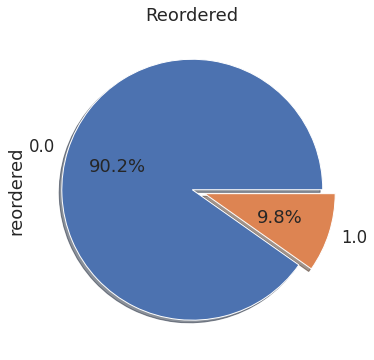

In [32]:
print(train_priors_prods.reordered.value_counts())

plt.figure(figsize=(8, 6))
train_priors_prods.reordered.value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.title('Reordered')
plt.show()

전체 구매한 제품 중 마지막 주문에서 재구매한 제품은 9.8%다.

유저의 재구매 여부를 어떻게하면 파악할 수 있을까?

제품별, 유저별 피쳐 생성

## ✅ 제품별

- 총 판매 수 
- 총 재주문 수
- 재주문 율
- 평균 장바구니 순위

In [73]:
agg_dict1 = {'product_id' : 'last', 
             'user_id' : 'nunique',
             'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean',
             'aisle' : 'last', 
             'aisle_id' : 'last', 
             'department' : 'last',
             'department_id' : 'last'}
col1 = ['product_id', 'unique_users', 'total_orders', 'total_reorders', 'reorder_rate', 'avg_cart_order', 'aisle','aisle_id','department','department_id']

prod_feats = df.groupby('product_name').agg(agg_dict1)
prod_feats.columns = col1
prod_feats.sort_values(by='total_orders', inplace=True, ascending=False)
prod_feats.reset_index(inplace=True)
prod_feats

,product_name,product_id,unique_users,total_orders,total_reorders,reorder_rate,avg_cart_order,aisle,aisle_id,department,department_id
0,Banana,24852.0,76125,491291,415166.0,0.845051,4.896617,fresh fruits,24.0,produce,4.0
1,Bag of Organic Bananas,13176.0,65655,394930,329275.0,0.833755,5.082916,fresh fruits,24.0,produce,4.0
2,Organic Strawberries,21137.0,61129,275577,214448.0,0.778178,7.279269,fresh fruits,24.0,produce,4.0
3,Organic Baby Spinach,21903.0,56766,251705,194939.0,0.774474,7.431807,packaged vegetables fruits,123.0,produce,4.0
4,Organic Hass Avocado,47209.0,44704,220877,176173.0,0.797607,6.781544,fresh fruits,24.0,produce,4.0
...,...,...,...,...,...,...,...,...,...,...,...
49680,Greek Blended Cherry Fat Free Yogurt,1908.0,1,1,0.0,0.000000,2.000000,yogurt,120.0,dairy eggs,16.0
49681,All Natural Stevia Liquid Extract Sweetener,1002.0,1,1,0.0,0.000000,4.000000,baking ingredients,17.0,pantry,13.0
49682,"Frittata, Farmer's Market",14756.0,1,1,0.0,0.000000,4.000000,frozen appetizers sides,129.0,frozen,1.0
49683,Max White With Polishing Star Soft Toothbrush,26627.0,1,1,0.0,0.000000,14.000000,oral hygiene,20.0,personal care,11.0


#### 소분류 & 대분류 정보 추가

In [61]:
agg_dict2 = {'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean'}

col2 = ['aisle_total_orders', 'aisle_total_reorders', 'aisle_reorder_rate', 'aisle_avg_cart_order']

aisle_feats = df.groupby('aisle').agg(agg_dict2)
aisle_feats.columns = col2
aisle_feats.sort_values(by='aisle_total_orders', inplace=True, ascending=False)
aisle_feats.reset_index(inplace=True)
aisle_feats.head()

,aisle,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_avg_cart_order
0,fresh fruits,3792661,2726251.0,0.718823,7.155288
1,fresh vegetables,3568630,2123540.0,0.595057,8.873229
2,packaged vegetables fruits,1843806,1178700.0,0.639275,8.417410
3,yogurt,1507583,1034957.0,0.686501,7.874719
4,packaged cheese,1021462,598280.0,0.585710,9.101530


In [72]:
agg_dict3 = {'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean'}

col3 = ['department_total_orders', 'department_total_reorders', 'department_reorder_rate', 'department_avg_cart_order']

dp_feats = df.groupby('department').agg(agg_dict3)
dp_feats.columns = col3
dp_feats.sort_values(by='department_total_orders', inplace=True, ascending=False)
dp_feats.reset_index(inplace=True)
dp_feats.head()

,department,department_total_orders,department_total_reorders,department_reorder_rate,department_avg_cart_order
0,produce,9888378,6432596.0,0.650521,8.039762
1,dairy eggs,5631067,3773723.0,0.670161,7.510144
2,snacks,3006412,1727075.0,0.574464,9.202543
3,beverages,2804175,1832952.0,0.653651,6.983270
4,frozen,2336858,1268058.0,0.542634,9.015474


In [74]:
prod_feats = prod_feats.merge(aisle_feats, on='aisle', how='left')
prod_feats = prod_feats.merge(dp_feats, on='department', how='left')
prod_feats = prod_feats[
    ['product_name', 'product_id', 'unique_users', 'total_orders', 'total_reorders', 
     'reorder_rate', 'avg_cart_order', 
     'aisle', 'aisle_id', 'aisle_total_orders', 'aisle_total_reorders', 
     'aisle_reorder_rate', 'aisle_avg_cart_order', 
     'department', 'department_id', 'department_total_orders', 'department_total_reorders', 
     'department_reorder_rate', 'department_avg_cart_order']
]
prod_feats.head()

,product_name,product_id,unique_users,total_orders,total_reorders,reorder_rate,avg_cart_order,aisle,aisle_id,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_avg_cart_order,department,department_id,department_total_orders,department_total_reorders,department_reorder_rate,department_avg_cart_order
0,Banana,24852.0,76125,491291,415166.0,0.845051,4.896617,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
1,Bag of Organic Bananas,13176.0,65655,394930,329275.0,0.833755,5.082916,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
2,Organic Strawberries,21137.0,61129,275577,214448.0,0.778178,7.279269,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
3,Organic Baby Spinach,21903.0,56766,251705,194939.0,0.774474,7.431807,packaged vegetables fruits,123.0,1843806,1178700.0,0.639275,8.417410,produce,4.0,9888378,6432596.0,0.650521,8.039762
4,Organic Hass Avocado,47209.0,44704,220877,176173.0,0.797607,6.781544,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762


### 분석

구매예측에 도움이 될 만한 것.

- 가장 많이 팔린 제품
- 판매량과 재구매율




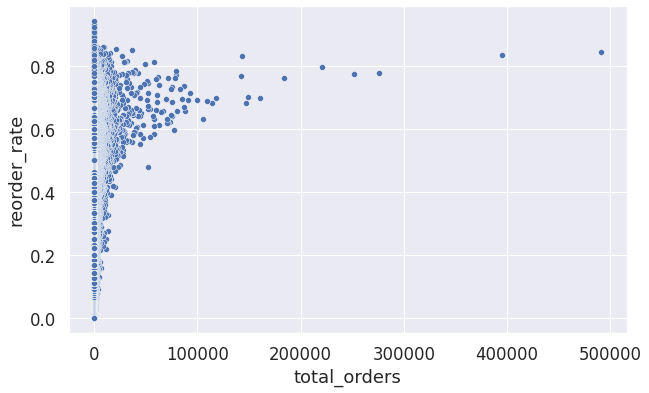

In [85]:
# 제품별 판매량과 재구매율
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_orders', y='reorder_rate', data=prod_feats)
plt.show()

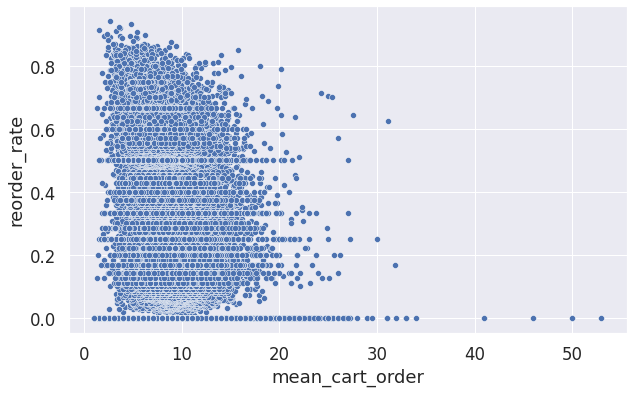

In [87]:
# 장바구니 순위와 재구매율
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_cart_order', y='reorder_rate', data=prod_feats)
plt.show()

top20 aisle

In [138]:
aisle_feats.head()

,aisle,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_mean_cart_order
0,fresh fruits,3792661,2726251.0,0.718823,7.155288
1,fresh vegetables,3568630,2123540.0,0.595057,8.873229
2,packaged vegetables fruits,1843806,1178700.0,0.639275,8.417410
3,yogurt,1507583,1034957.0,0.686501,7.874719
4,packaged cheese,1021462,598280.0,0.585710,9.101530


## ✅ 주문별 정보

In [77]:
user_order_agg_dict = {'product_id': 'count', 
                       'reordered' : 'mean'}

user_order_col = ['items', 'reorder_in_order']

user_orders = df.groupby(['user_id','order_number']).agg(user_order_agg_dict)
user_orders.columns = user_order_col
user_orders.reset_index(inplace=True)
user_orders = user_orders.merge(df.drop_duplicates(['user_id', 'order_number'])[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                                                                   'days_since_prior_order', 'order_id', 'eval_set']], on=['user_id','order_number'], how='left')
user_orders

,user_id,order_number,items,reorder_in_order,order_dow,order_hour_of_day,days_since_prior_order,order_id,eval_set
0,1,1,5,0.000000,2,8,NaN,2539329,prior
1,1,2,6,0.500000,3,7,15.0,2398795,prior
2,1,3,5,0.600000,3,12,21.0,473747,prior
3,1,4,5,1.000000,4,7,29.0,2254736,prior
4,1,5,8,0.625000,4,15,28.0,431534,prior
...,...,...,...,...,...,...,...,...,...
3421078,206209,10,9,0.333333,5,18,29.0,2266710,prior
3421079,206209,11,8,0.750000,4,10,30.0,1854736,prior
3421080,206209,12,20,0.700000,1,12,18.0,626363,prior
3421081,206209,13,9,0.444444,1,12,7.0,2977660,prior


## ✅ 유저별

- 총 주문 수
- 총 구매 제품 수
- 총 구매 제품 종류 수
- 재구매 제품 수
- 재구매 제품 비율
- 주문당 평균 구매 제품 수
- 주문당 평균 재구매 제품 비율


주문 요일, 시간, 재주문 기간에 따른 구매 제품의 변화?

In [78]:
user_agg_dict2 = {'order_number' : 'max', 
             'product_id' : ['count', 'nunique'], 
             'reordered' : ['sum', 'mean']}
user_col2 = ['total_orders', 'total_products', 'unique_products', 'total_reorders', 'reorder_rate']

users = df.dropna(subset=['product_id']).groupby('user_id').agg(user_agg_dict2) # product_id가 결측치인 행은 제거 (테스트 셋인 7.5만명의 마지막 주문 삭제)
users.columns = user_col2
users.reset_index(inplace=True)
users['avg_items_in_order'] = user_orders.groupby('user_id')['items'].mean().values
users['avg_reorder_in_order'] = user_orders[user_orders['order_number'] != 1].groupby('user_id')['reorder_in_order'].mean().values
users

,user_id,total_orders,total_products,unique_products,total_reorders,reorder_rate,avg_items_in_order,avg_reorder_in_order
0,1,11,70,19,51.0,0.728571,6.363636,0.796742
1,2,15,226,121,105.0,0.464602,15.066667,0.475611
2,3,12,88,33,55.0,0.625000,6.769231,0.718710
3,4,5,18,17,1.0,0.055556,3.000000,0.035714
4,5,5,46,28,18.0,0.391304,9.200000,0.488889
...,...,...,...,...,...,...,...,...
206204,206205,4,51,37,14.0,0.274510,12.750000,0.474311
206205,206206,67,285,150,135.0,0.473684,4.191176,0.579323
206206,206207,16,223,92,131.0,0.587444,13.117647,0.679620
206207,206208,49,677,198,479.0,0.707533,13.540000,0.714959


### 찍어볼 것들

# 수정

## 가장 많이 팔린 제품 (Top 20)

In [116]:
prod_feats.head()

,product_name,product_id,unique_users,total_orders,total_reorders,reorder_rate,avg_cart_order,aisle,aisle_id,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_avg_cart_order,department,department_id,department_total_orders,department_total_reorders,department_reorder_rate,department_avg_cart_order
0,Banana,24852.0,76125,491291,415166.0,0.845051,4.896617,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
1,Bag of Organic Bananas,13176.0,65655,394930,329275.0,0.833755,5.082916,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
2,Organic Strawberries,21137.0,61129,275577,214448.0,0.778178,7.279269,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
3,Organic Baby Spinach,21903.0,56766,251705,194939.0,0.774474,7.431807,packaged vegetables fruits,123.0,1843806,1178700.0,0.639275,8.417410,produce,4.0,9888378,6432596.0,0.650521,8.039762
4,Organic Hass Avocado,47209.0,44704,220877,176173.0,0.797607,6.781544,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762


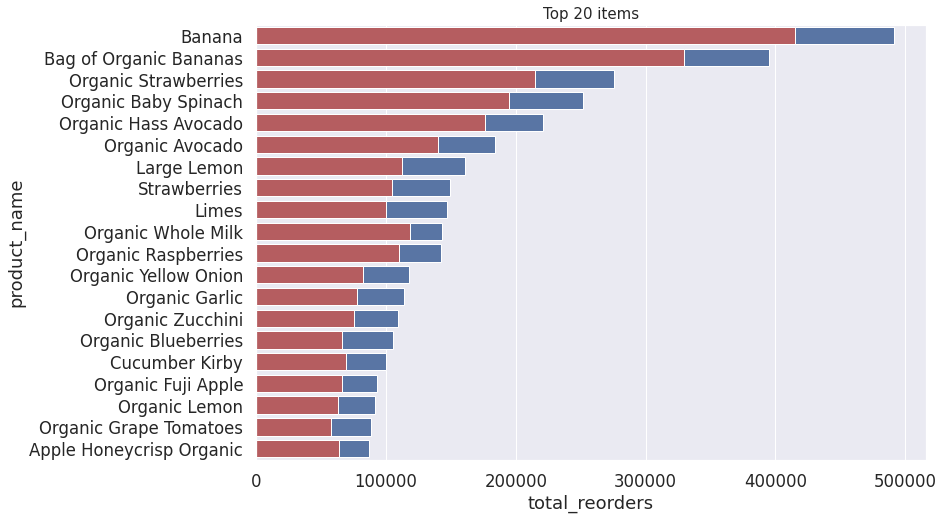

In [117]:
# 가장 많이 팔린 제품 Top20
plt.figure(figsize=(12, 8))
plt.title('Top 20 items', fontsize=15)
sns.barplot(prod_feats.total_orders.astype(np.object0)[0:20], prod_feats.product_name.astype(np.object0)[0:20], label='total', color=color[0])
sns.barplot(prod_feats.total_reorders.astype(np.object0)[0:20], prod_feats.product_name.astype(np.object0)[0:20], label='reorders', color=color[3])
plt.show()

 Top20 제품의 대부분이 과일, 채소 등 신선식품이며 판매량 1,2위 모두 바나나로 가장 많이 팔렸다. Oragnic 제품이 상위권에 많이 분포한 것을 알 수 있다.

## 가장 많이 팔린 순서

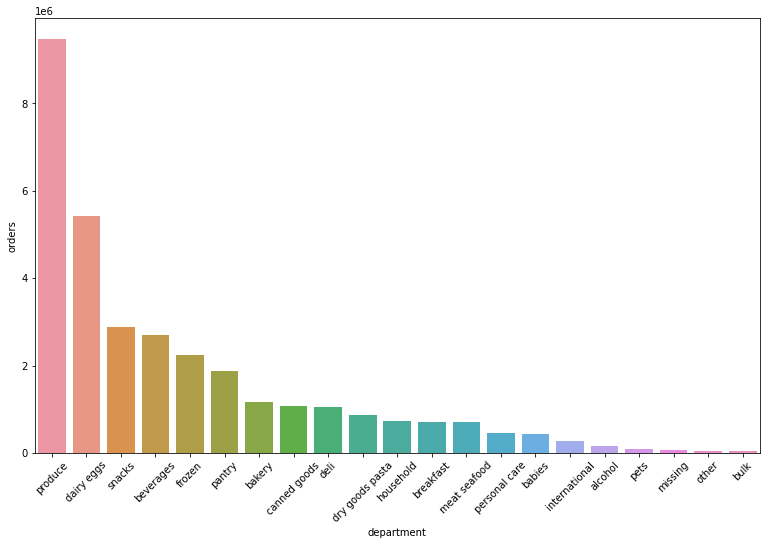

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='department', y='orders', data=departments.sort_values(by='orders', ascending=False))
plt.xticks(rotation=45)
plt.show()

농작물과 유제품&달걀류가 가장 많이 팔리는 것을 확인할 수 있다.

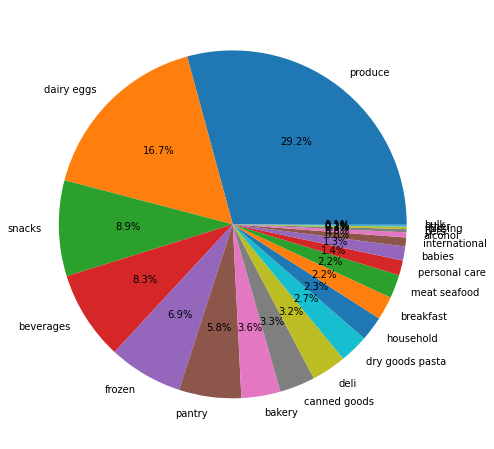

In [ ]:
data = departments.sort_values(by='orders', ascending=False)
plt.figure(figsize=(13, 8))
plt.pie(x=data.orders, labels=data.department, autopct='%.1f%%')
plt.xticks(rotation=45)
plt.show()

produce 카테고리가 전체 상품 중 29.2를 차지한다. 그 다음 유제품 & 달걀이 많이 팔렸다.

## 재주문율

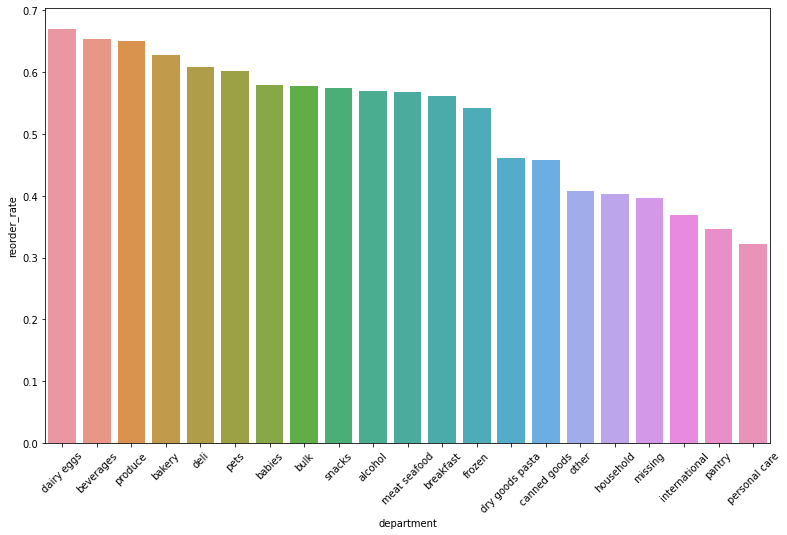

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='department', y='reorder_rate', data=departments.sort_values(by='reorder_rate', ascending=False))
plt.xticks(rotation=45)
plt.show()

재주문율이 가장 높은 카테고리는 dairy eggs이다.

## 평균 장바구니 순위

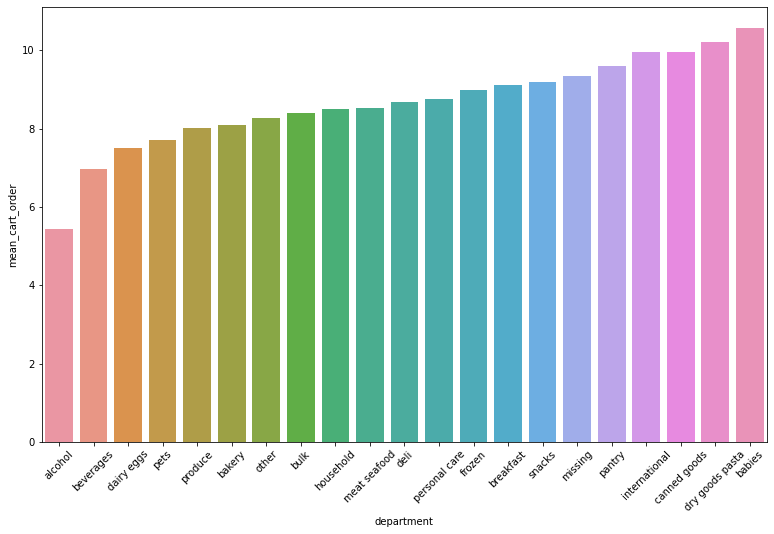

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='department', y='mean_cart_order', data=departments.sort_values(by='mean_cart_order'))
plt.xticks(rotation=45)
plt.show()

장바구니에 가장 먼저 담긴 카테고리는 alcohol > beberages > dairy eggs 순서이다. add_to_cart_order에서 장바구니에 먼저 담긴 상품일수록 재구매율이 높아지는 경향을 확인했는데, 이부분과 연결하여 생각해볼 필요가 있어보인다.

## 가장 많이 팔린 순서 (Top 20)

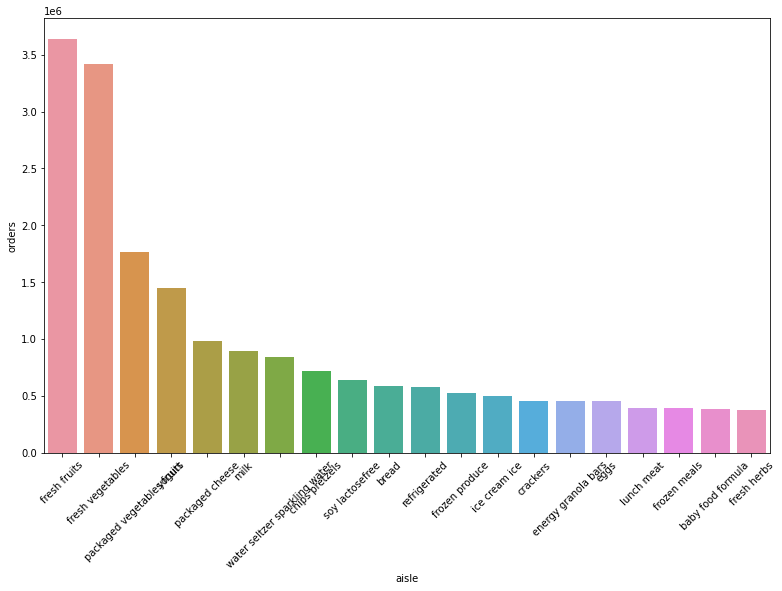

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='aisle', y='orders', data=aisles.sort_values(by='orders', ascending=False).head(20))
plt.xticks(rotation=45)
plt.show()

위에서 본 것과 마찬가지로 과일, 야채 등 신선식품류가 가장 많이 판매됐다.

## 재주문율

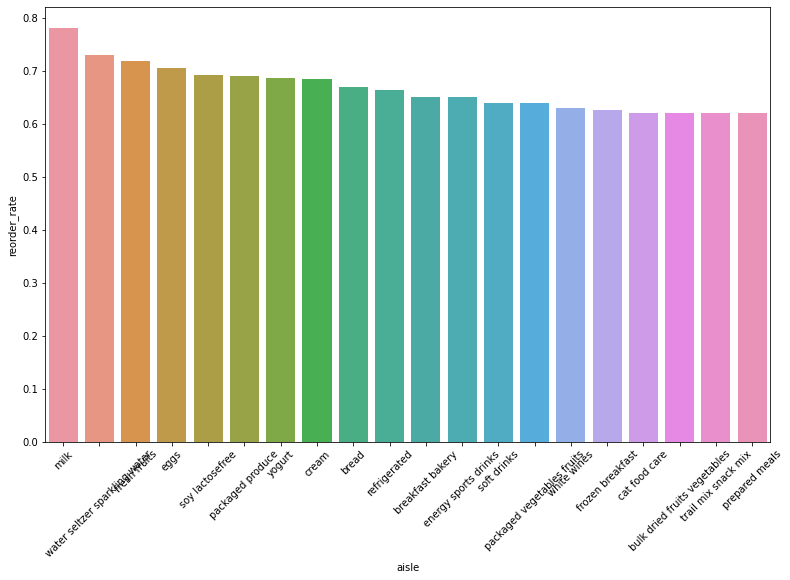

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='aisle', y='reorder_rate', data=aisles.sort_values(by='reorder_rate', ascending=False).head(20))
plt.xticks(rotation=45)
plt.show()

milk가 가장 높은 재구매율을 보인다.

## 평균 장바구니 순위

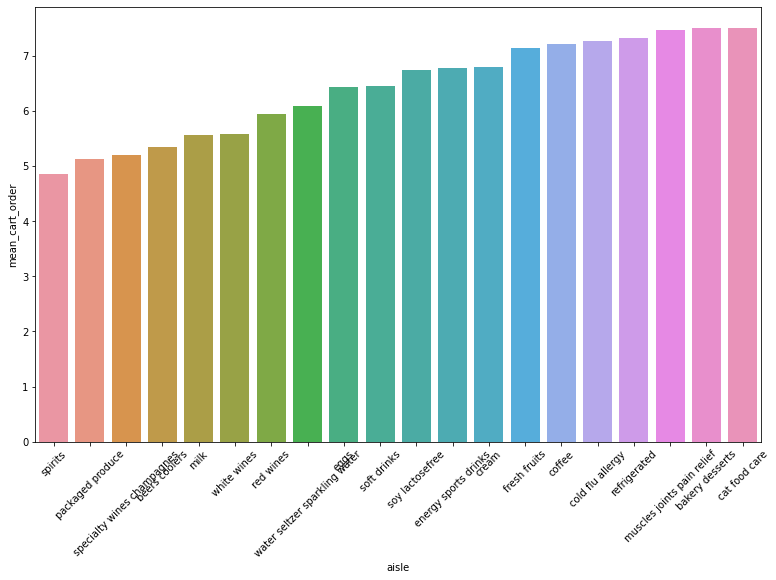

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(x='aisle', y='mean_cart_order', data=aisles.sort_values(by='mean_cart_order').head(20))
plt.xticks(rotation=45)
plt.show()

평균 장바구니 순위는 aisle 기준에서도 술이 가장 먼저 담기는 것으로 나타났다.

# ✅ products 제품별

- 구매한 유저 수
- 총 판매 수 
- 총 재주문 수
- 재주문 율
- 평균 장바구니 순위

In [ ]:
agg_dict1 = {'product_id' : 'last', 
             'user_id' : 'nunique',
             'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean',
             'aisle' : 'last', 
             'aisle_id' : 'last', 
             'department' : 'last',
             'department_id' : 'last'}
col1 = ['product_id', 'unique_users', 'total_orders', 'total_reorders', 'reorder_rate', 'avg_cart_order', 'aisle','aisle_id','department','department_id']

prod_feats = df.groupby('product_name').agg(agg_dict1)
prod_feats.columns = col1
prod_feats.sort_values(by='total_orders', inplace=True, ascending=False)
prod_feats.reset_index(inplace=True)
prod_feats

,product_name,product_id,unique_users,total_orders,total_reorders,reorder_rate,avg_cart_order,aisle,aisle_id,department,department_id
0,Banana,24852.0,76125,491291,415166.0,0.845051,4.896617,fresh fruits,24.0,produce,4.0
1,Bag of Organic Bananas,13176.0,65655,394930,329275.0,0.833755,5.082916,fresh fruits,24.0,produce,4.0
2,Organic Strawberries,21137.0,61129,275577,214448.0,0.778178,7.279269,fresh fruits,24.0,produce,4.0
3,Organic Baby Spinach,21903.0,56766,251705,194939.0,0.774474,7.431807,packaged vegetables fruits,123.0,produce,4.0
4,Organic Hass Avocado,47209.0,44704,220877,176173.0,0.797607,6.781544,fresh fruits,24.0,produce,4.0
...,...,...,...,...,...,...,...,...,...,...,...
49680,Greek Blended Cherry Fat Free Yogurt,1908.0,1,1,0.0,0.000000,2.000000,yogurt,120.0,dairy eggs,16.0
49681,All Natural Stevia Liquid Extract Sweetener,1002.0,1,1,0.0,0.000000,4.000000,baking ingredients,17.0,pantry,13.0
49682,"Frittata, Farmer's Market",14756.0,1,1,0.0,0.000000,4.000000,frozen appetizers sides,129.0,frozen,1.0
49683,Max White With Polishing Star Soft Toothbrush,26627.0,1,1,0.0,0.000000,14.000000,oral hygiene,20.0,personal care,11.0


- 소분류 & 대분류 정보 추가

In [ ]:
agg_dict2 = {'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean'}

col2 = ['aisle_total_orders', 'aisle_total_reorders', 'aisle_reorder_rate', 'aisle_avg_cart_order']

aisle_feats = df.groupby('aisle').agg(agg_dict2)
aisle_feats.columns = col2
aisle_feats.sort_values(by='aisle_total_orders', inplace=True, ascending=False)
aisle_feats.reset_index(inplace=True)
aisle_feats.head()

,aisle,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_avg_cart_order
0,fresh fruits,3792661,2726251.0,0.718823,7.155288
1,fresh vegetables,3568630,2123540.0,0.595057,8.873229
2,packaged vegetables fruits,1843806,1178700.0,0.639275,8.417410
3,yogurt,1507583,1034957.0,0.686501,7.874719
4,packaged cheese,1021462,598280.0,0.585710,9.101530


In [ ]:
agg_dict3 = {'reordered' : ['count','sum','mean'], 
             'add_to_cart_order' : 'mean'}

col3 = ['department_total_orders', 'department_total_reorders', 'department_reorder_rate', 'department_avg_cart_order']

dp_feats = df.groupby('department').agg(agg_dict3)
dp_feats.columns = col3
dp_feats.sort_values(by='department_total_orders', inplace=True, ascending=False)
dp_feats.reset_index(inplace=True)
dp_feats.head()

,department,department_total_orders,department_total_reorders,department_reorder_rate,department_avg_cart_order
0,produce,9888378,6432596.0,0.650521,8.039762
1,dairy eggs,5631067,3773723.0,0.670161,7.510144
2,snacks,3006412,1727075.0,0.574464,9.202543
3,beverages,2804175,1832952.0,0.653651,6.983270
4,frozen,2336858,1268058.0,0.542634,9.015474


In [ ]:
prod_feats = prod_feats.merge(aisle_feats, on='aisle', how='left')
prod_feats = prod_feats.merge(dp_feats, on='department', how='left')
prod_feats = prod_feats[
    ['product_name', 'product_id', 'unique_users', 'total_orders', 'total_reorders', 
     'reorder_rate', 'avg_cart_order', 
     'aisle', 'aisle_id', 'aisle_total_orders', 'aisle_total_reorders', 
     'aisle_reorder_rate', 'aisle_avg_cart_order', 
     'department', 'department_id', 'department_total_orders', 'department_total_reorders', 
     'department_reorder_rate', 'department_avg_cart_order']
]
prod_feats.head()

,product_name,product_id,unique_users,total_orders,total_reorders,reorder_rate,avg_cart_order,aisle,aisle_id,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_avg_cart_order,department,department_id,department_total_orders,department_total_reorders,department_reorder_rate,department_avg_cart_order
0,Banana,24852.0,76125,491291,415166.0,0.845051,4.896617,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
1,Bag of Organic Bananas,13176.0,65655,394930,329275.0,0.833755,5.082916,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
2,Organic Strawberries,21137.0,61129,275577,214448.0,0.778178,7.279269,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762
3,Organic Baby Spinach,21903.0,56766,251705,194939.0,0.774474,7.431807,packaged vegetables fruits,123.0,1843806,1178700.0,0.639275,8.417410,produce,4.0,9888378,6432596.0,0.650521,8.039762
4,Organic Hass Avocado,47209.0,44704,220877,176173.0,0.797607,6.781544,fresh fruits,24.0,3792661,2726251.0,0.718823,7.155288,produce,4.0,9888378,6432596.0,0.650521,8.039762


### 분석

구매예측에 도움이 될 만한 것.

- 가장 많이 팔린 제품
- 판매량과 재구매율




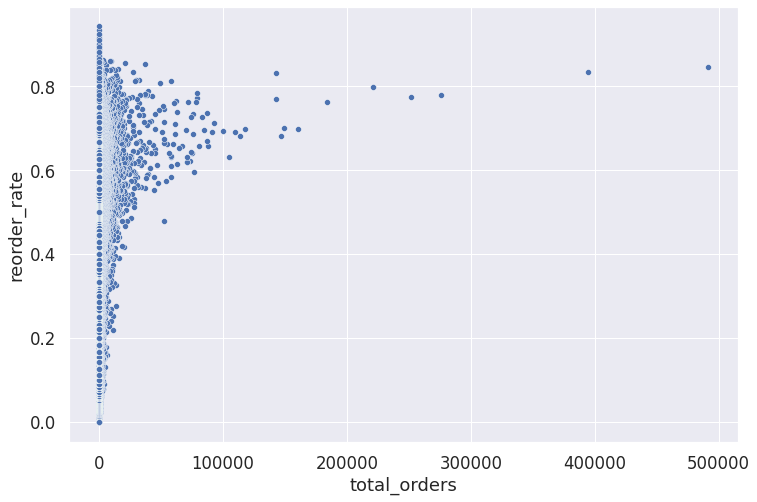

In [118]:
# 제품별 판매량과 재구매율
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_orders', y='reorder_rate', data=prod_feats)
plt.show()

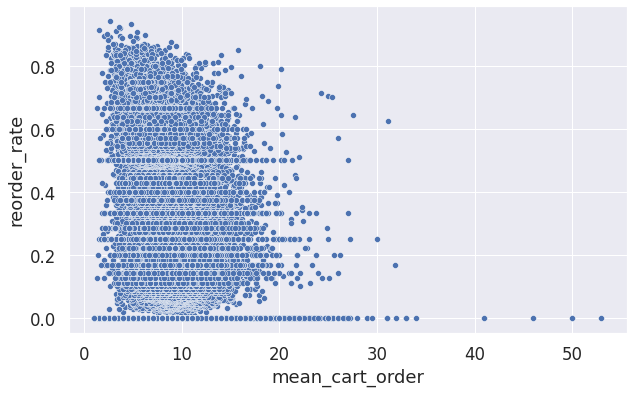

In [ ]:
# 장바구니 순위와 재구매율
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_cart_order', y='reorder_rate', data=prod_feats)
plt.show()

top20 aisle

In [ ]:
aisle_feats

,aisle,aisle_total_orders,aisle_total_reorders,aisle_reorder_rate,aisle_mean_cart_order
0,fresh fruits,3792661,2726251.0,0.718823,7.155288
1,fresh vegetables,3568630,2123540.0,0.595057,8.873229
2,packaged vegetables fruits,1843806,1178700.0,0.639275,8.417410
3,yogurt,1507583,1034957.0,0.686501,7.874719
4,packaged cheese,1021462,598280.0,0.585710,9.101530
